# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [5]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

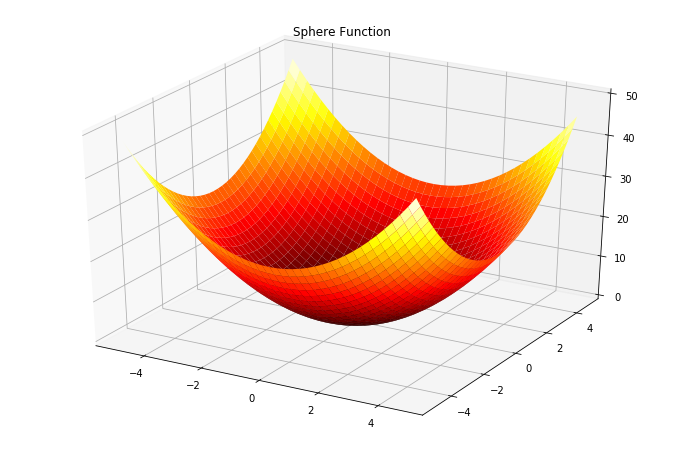

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

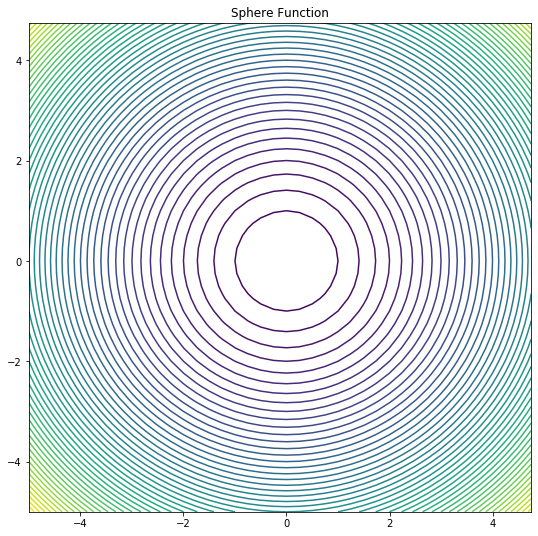

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

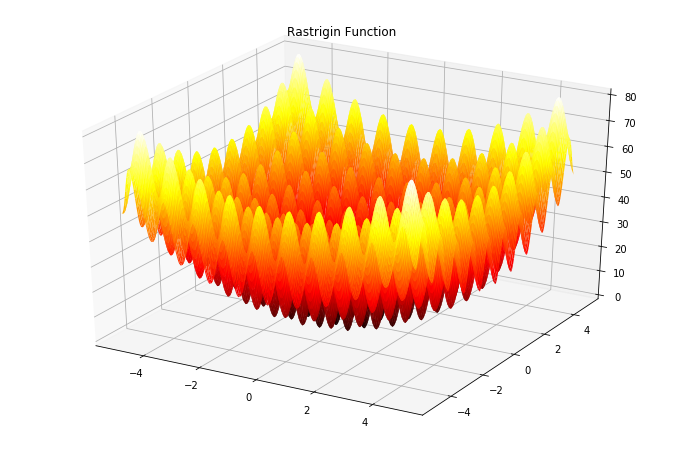

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

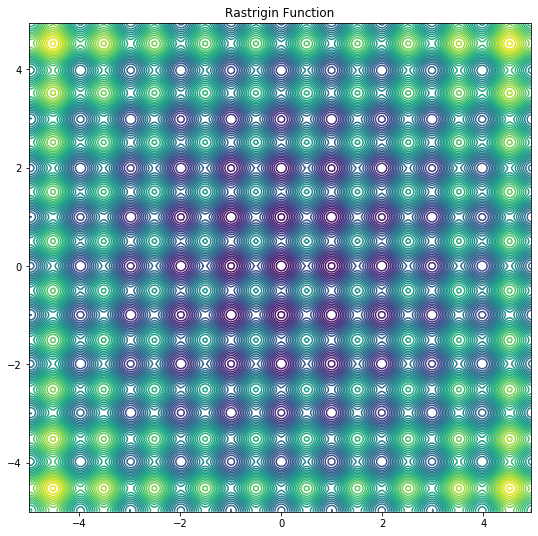

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

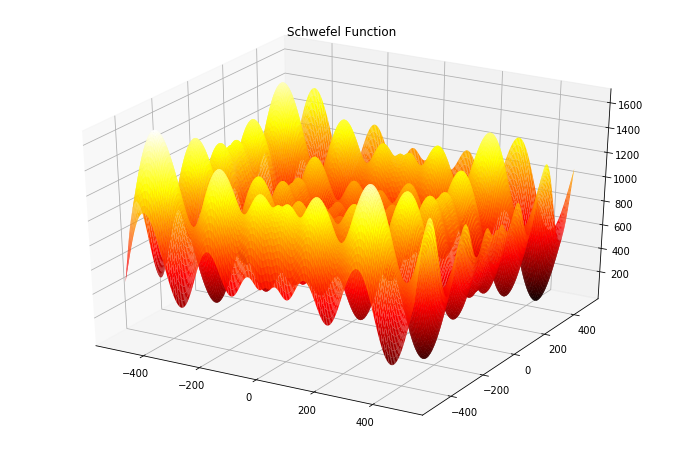

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

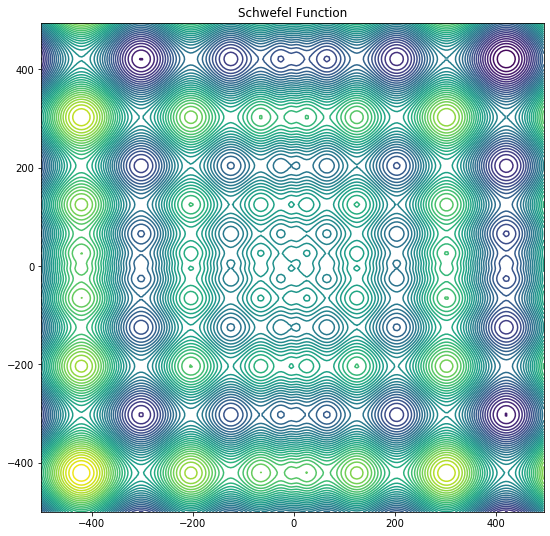

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

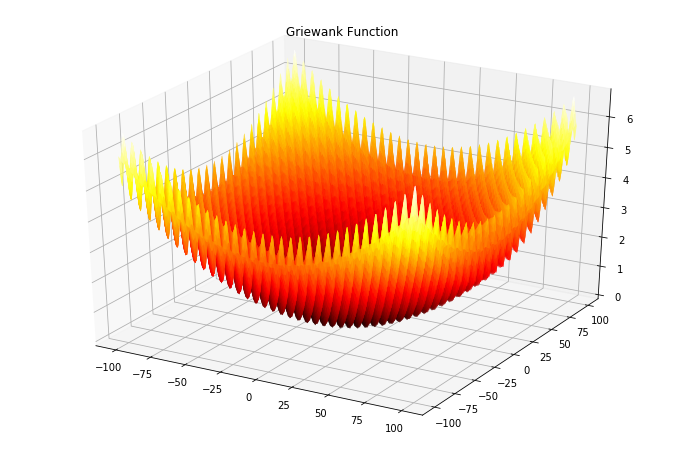

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

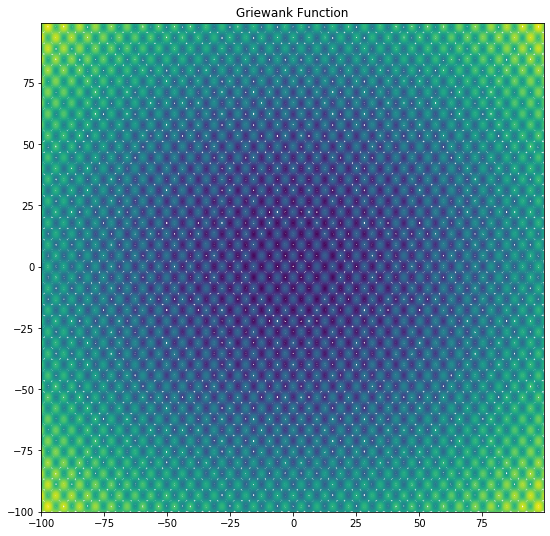

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [17]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkĹad normalny $\mathcal{N}(0, \sigma^2)$, zaĹ $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [18]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

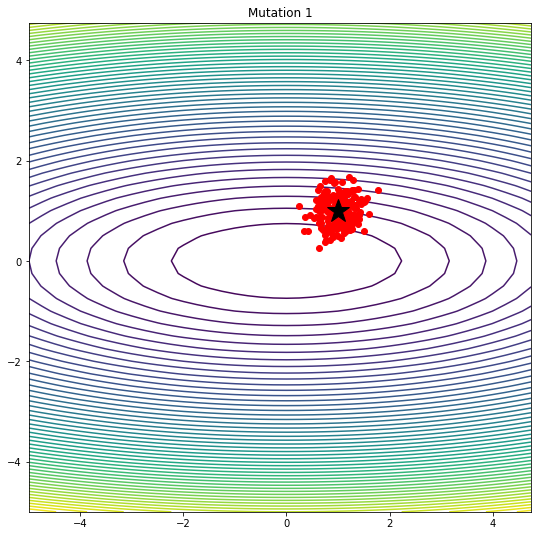

In [19]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkĹad normalny $\mathcal{N}(0, \sigma_i^2)$, zaĹ $\sigma_i$ moĹźe byÄ rĂłĹźna dla rĂłĹźnych $i = 1, 2, \ldots, d$

In [20]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

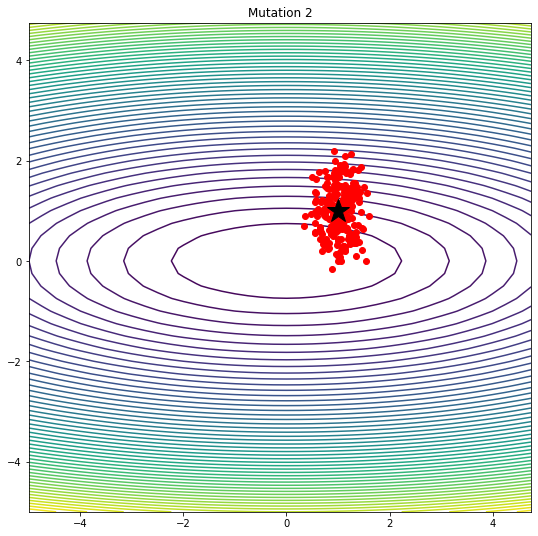

In [21]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkĹad normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [22]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

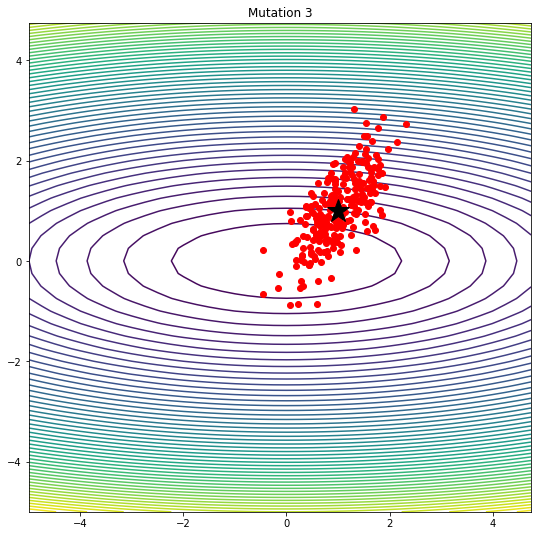

In [23]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [24]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

#### D = 10



			10 DIMENSIONS

Iteration 0000 : best score = -5836.68414822, mean score = -26114.82830279.
Iteration 0010 : best score = -26.14704620, mean score = -211.47752654.
Iteration 0020 : best score = -0.04686106, mean score = -0.52829040.
Iteration 0030 : best score = -0.00011499, mean score = -0.00102206.
Iteration 0040 : best score = -0.00000025, mean score = -0.00000164.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


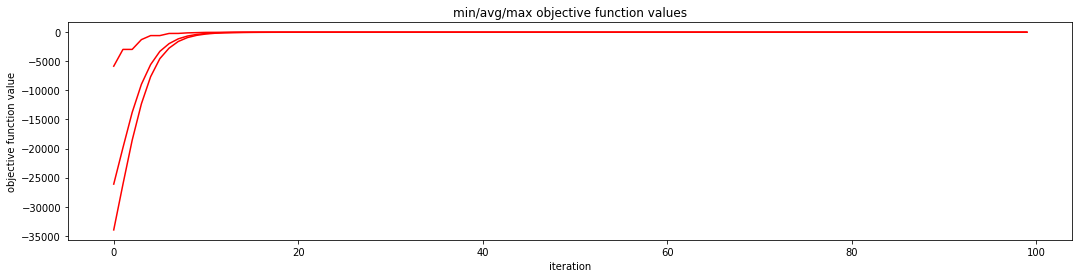

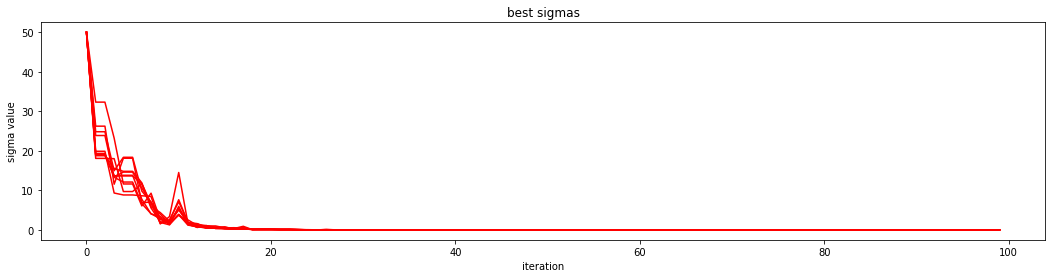



			20 DIMENSIONS

Iteration 0000 : best score = -23738.87679982, mean score = -59165.43378230.
Iteration 0010 : best score = -802.27572444, mean score = -2278.03772073.
Iteration 0020 : best score = -21.93722919, mean score = -58.92540970.
Iteration 0030 : best score = -0.53363707, mean score = -1.46273288.
Iteration 0040 : best score = -0.01575212, mean score = -0.04100295.
Iteration 0050 : best score = -0.00035621, mean score = -0.00101243.
Iteration 0060 : best score = -0.00000933, mean score = -0.00002243.
Iteration 0070 : best score = -0.00000019, mean score = -0.00000057.
Iteration 0080 : best score = -0.00000001, mean score = -0.00000002.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


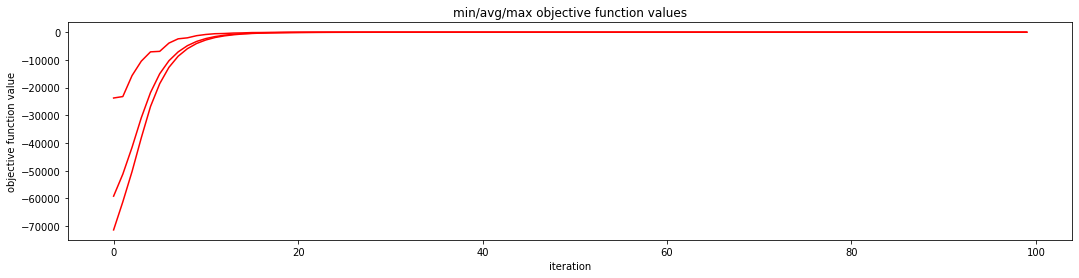

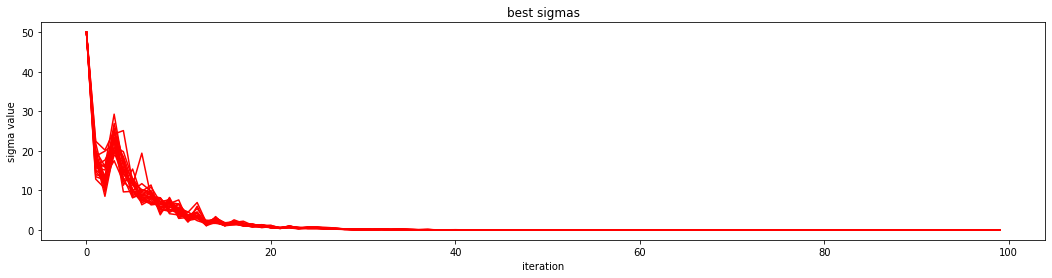



			50 DIMENSIONS

Iteration 0000 : best score = -99643.79913613, mean score = -161048.27778258.
Iteration 0010 : best score = -17038.51032980, mean score = -28857.42969537.
Iteration 0020 : best score = -3501.19482624, mean score = -5500.72242027.
Iteration 0030 : best score = -803.83793616, mean score = -1130.16341618.
Iteration 0040 : best score = -172.72536708, mean score = -246.78250783.
Iteration 0050 : best score = -38.06623065, mean score = -57.70492699.
Iteration 0060 : best score = -9.42271568, mean score = -12.98719091.
Iteration 0070 : best score = -2.46237447, mean score = -3.28528562.
Iteration 0080 : best score = -0.52464676, mean score = -0.78613524.
Iteration 0090 : best score = -0.12240859, mean score = -0.18565670.


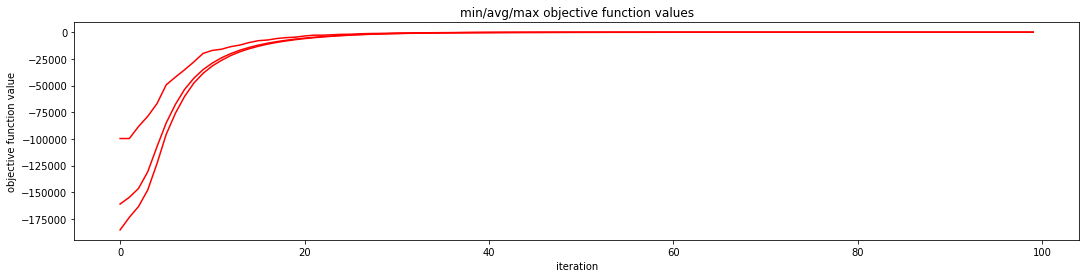

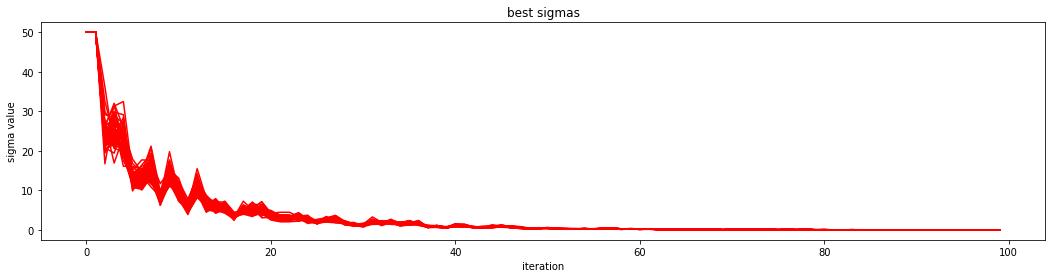



			100 DIMENSIONS

Iteration 0000 : best score = -225156.79425383, mean score = -328748.65186229.
Iteration 0010 : best score = -101848.12325008, mean score = -132123.48598213.
Iteration 0020 : best score = -40909.60320737, mean score = -49225.83336478.
Iteration 0030 : best score = -17280.68389640, mean score = -21833.31290069.
Iteration 0040 : best score = -8451.01743461, mean score = -10219.28964841.
Iteration 0050 : best score = -3982.05955901, mean score = -4859.58699402.
Iteration 0060 : best score = -2038.81659480, mean score = -2368.94459734.
Iteration 0070 : best score = -986.72808257, mean score = -1173.51569136.
Iteration 0080 : best score = -509.11562177, mean score = -590.90514141.
Iteration 0090 : best score = -247.12061369, mean score = -293.73532650.


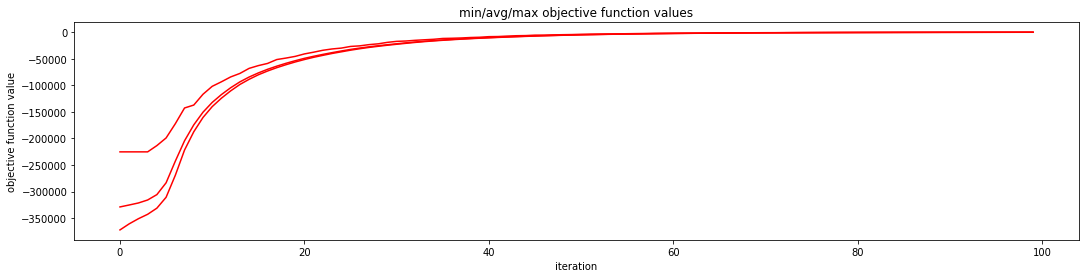

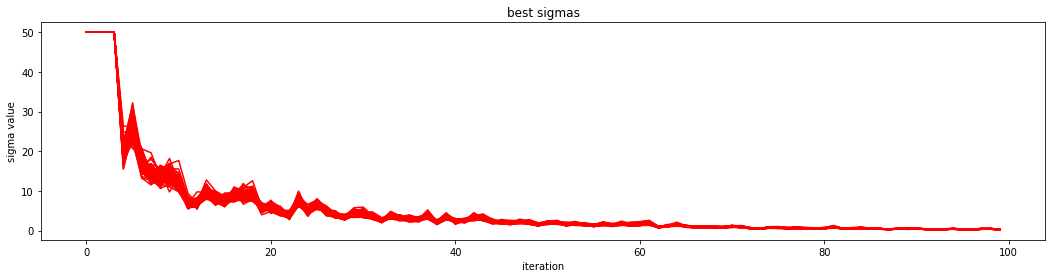

In [27]:
DIMS = [10, 20, 50, 100]
N = 2000
T = 100

for d in DIMS:
    print(f'\n\n\t\t\t{d} DIMENSIONS\n')
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6



			10 DIMENSIONS

Iteration 0000 : best score = -6097.02469535, mean score = -26165.84469210.
Iteration 0010 : best score = -89.55156847, mean score = -304.87983278.
Iteration 0020 : best score = -27.20553293, mean score = -75.54919575.
Iteration 0030 : best score = -27.20553293, mean score = -62.16487294.
Iteration 0040 : best score = -22.78489123, mean score = -56.16469559.
Iteration 0050 : best score = -20.03864499, mean score = -52.44901341.
Iteration 0060 : best score = -16.33755467, mean score = -49.37746379.
Iteration 0070 : best score = -5.20227288, mean score = -19.36737198.
Iteration 0080 : best score = -1.99669861, mean score = -2.03843101.
Iteration 0090 : best score = -1.98993470, mean score = -1.99004099.


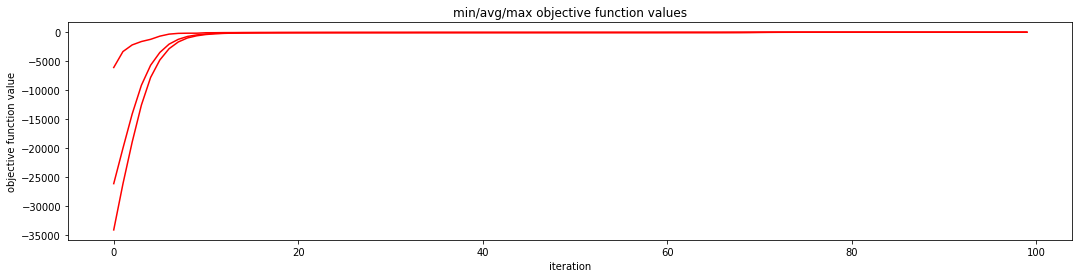

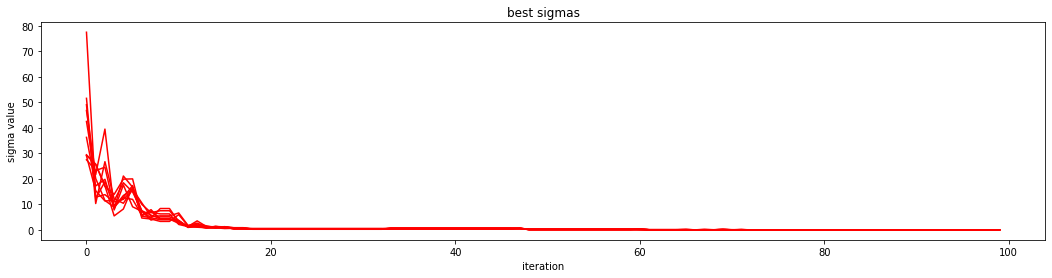



			20 DIMENSIONS

Iteration 0000 : best score = -22138.46661327, mean score = -59580.69032536.
Iteration 0010 : best score = -951.67859699, mean score = -2595.22229436.
Iteration 0020 : best score = -173.36717344, mean score = -261.86211419.
Iteration 0030 : best score = -115.51668101, mean score = -176.44543462.
Iteration 0040 : best score = -92.17022959, mean score = -157.82331855.
Iteration 0050 : best score = -86.67614486, mean score = -148.80673144.
Iteration 0060 : best score = -86.67614486, mean score = -142.75094058.
Iteration 0070 : best score = -86.67614486, mean score = -137.16371715.
Iteration 0080 : best score = -34.88736397, mean score = -56.91538124.
Iteration 0090 : best score = -16.26083010, mean score = -16.82620334.


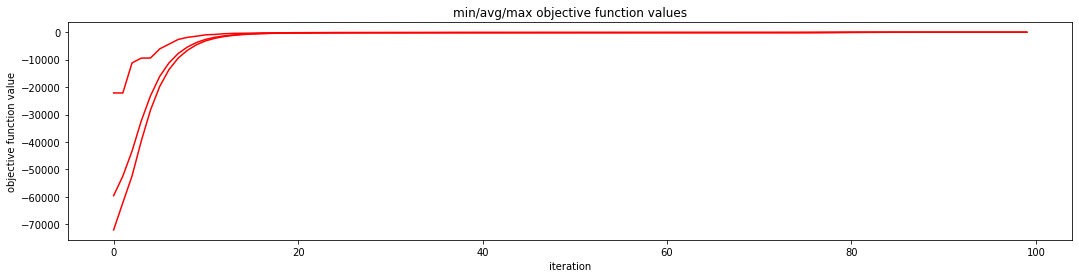

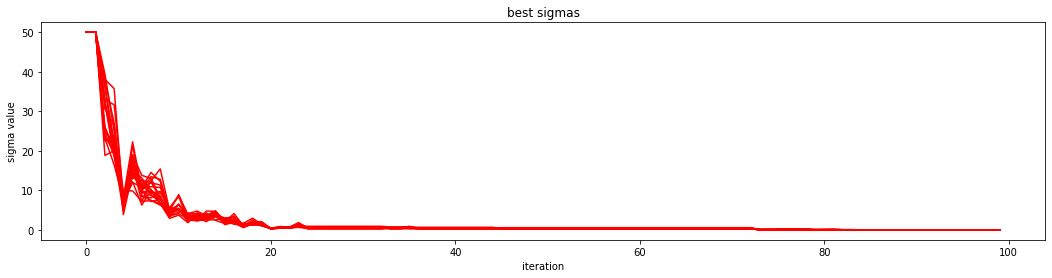



			50 DIMENSIONS

Iteration 0000 : best score = -101014.60637519, mean score = -161203.48130525.
Iteration 0010 : best score = -18737.63780480, mean score = -28426.27185544.
Iteration 0020 : best score = -4081.22753629, mean score = -5569.05996882.
Iteration 0030 : best score = -1235.90668261, mean score = -1604.39430639.
Iteration 0040 : best score = -616.90107677, mean score = -780.49990867.
Iteration 0050 : best score = -480.62883011, mean score = -609.54380977.
Iteration 0060 : best score = -447.63101346, mean score = -554.13002946.
Iteration 0070 : best score = -438.83131040, mean score = -528.70805705.
Iteration 0080 : best score = -419.10223354, mean score = -512.26418088.
Iteration 0090 : best score = -407.34858441, mean score = -499.83214111.


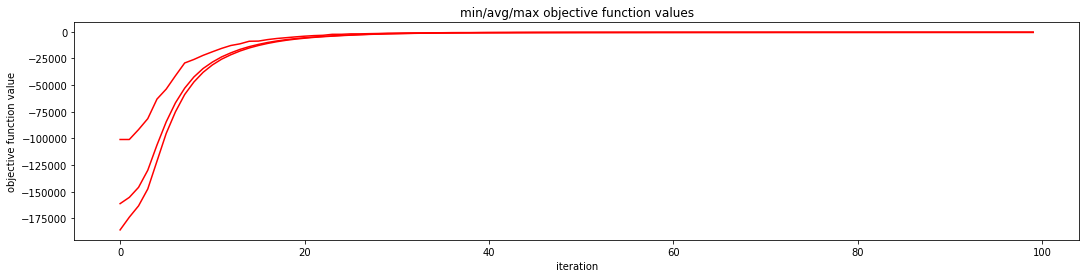

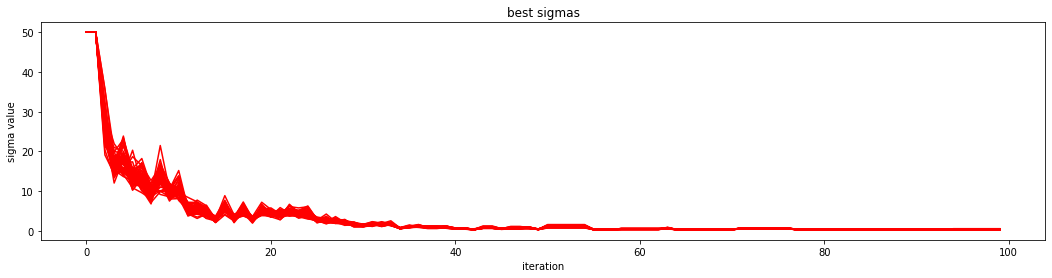



			100 DIMENSIONS

Iteration 0000 : best score = -244986.07614572, mean score = -330996.56899133.
Iteration 0010 : best score = -102691.20444707, mean score = -128427.80190343.
Iteration 0020 : best score = -41084.76004275, mean score = -47465.72025809.
Iteration 0030 : best score = -19547.10667459, mean score = -23053.26154738.
Iteration 0040 : best score = -10489.09290292, mean score = -11838.61863747.
Iteration 0050 : best score = -5457.72462674, mean score = -6326.64513096.
Iteration 0060 : best score = -3274.19870606, mean score = -3655.69530169.
Iteration 0070 : best score = -2157.28599341, mean score = -2391.39784698.
Iteration 0080 : best score = -1606.25975738, mean score = -1827.34513602.
Iteration 0090 : best score = -1316.87406284, mean score = -1546.24425968.


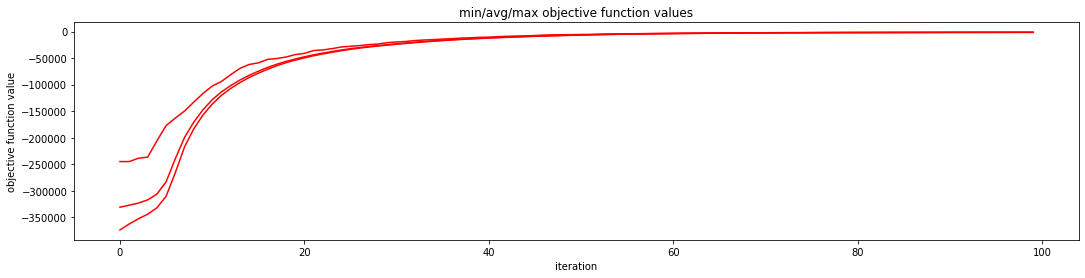

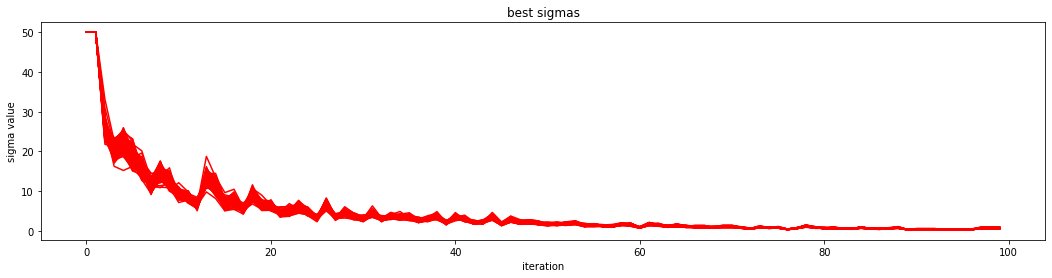

In [28]:
N = 2000
T = 100

for d in DIMS:
    print(f'\n\n\t\t\t{d} DIMENSIONS\n')

    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8



			10 DIMENSIONS

Iteration 0000 : best score = -2.60396530, mean score = -7.64917474.
Iteration 0010 : best score = -0.51858934, mean score = -1.04958878.
Iteration 0020 : best score = -0.15926620, mean score = -0.84410925.
Iteration 0030 : best score = -0.00058493, mean score = -0.00410661.
Iteration 0040 : best score = -0.00000082, mean score = -0.00001142.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000005.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


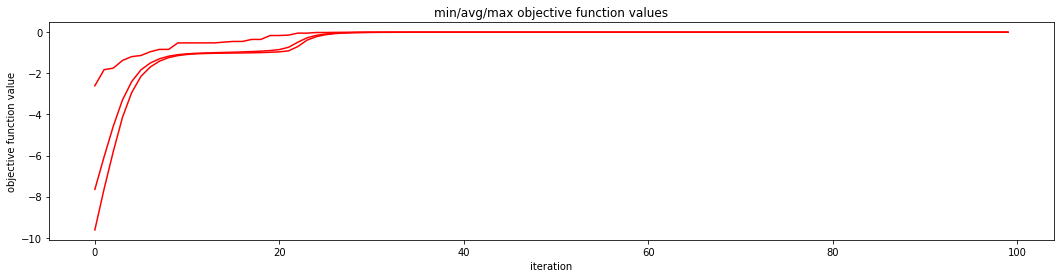

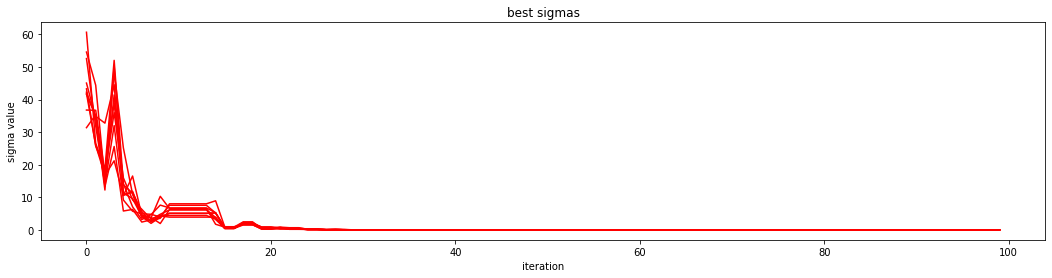



			20 DIMENSIONS

Iteration 0000 : best score = -7.40225626, mean score = -16.00148170.
Iteration 0010 : best score = -1.23672013, mean score = -1.56233810.
Iteration 0020 : best score = -0.69859776, mean score = -0.99588763.
Iteration 0030 : best score = -0.04626949, mean score = -0.10655128.
Iteration 0040 : best score = -0.00313187, mean score = -0.00953364.
Iteration 0050 : best score = -0.00054291, mean score = -0.00106107.
Iteration 0060 : best score = -0.00005724, mean score = -0.00011044.
Iteration 0070 : best score = -0.00000387, mean score = -0.00000826.
Iteration 0080 : best score = -0.00000021, mean score = -0.00000049.
Iteration 0090 : best score = -0.00000001, mean score = -0.00000003.


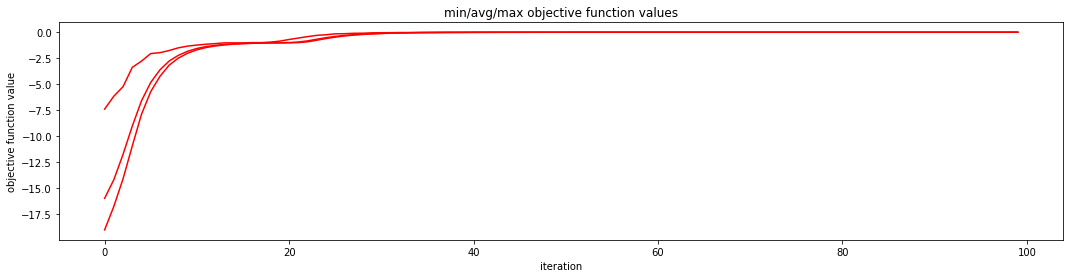

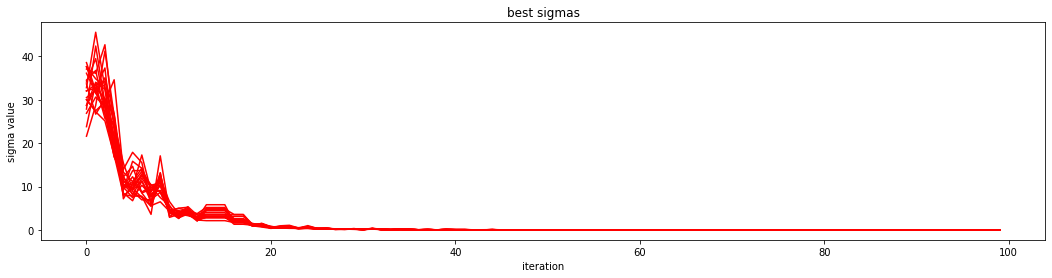



			50 DIMENSIONS

Iteration 0000 : best score = -26.85451044, mean score = -41.19058243.
Iteration 0010 : best score = -5.91284928, mean score = -8.10535294.
Iteration 0020 : best score = -1.90658313, mean score = -2.29579006.
Iteration 0030 : best score = -1.17812854, mean score = -1.26631792.
Iteration 0040 : best score = -1.04079485, mean score = -1.06009188.
Iteration 0050 : best score = -0.68751075, mean score = -0.81529931.
Iteration 0060 : best score = -0.36204279, mean score = -0.42826176.
Iteration 0070 : best score = -0.20055905, mean score = -0.24070292.
Iteration 0080 : best score = -0.11917442, mean score = -0.14061696.
Iteration 0090 : best score = -0.06834695, mean score = -0.07910077.


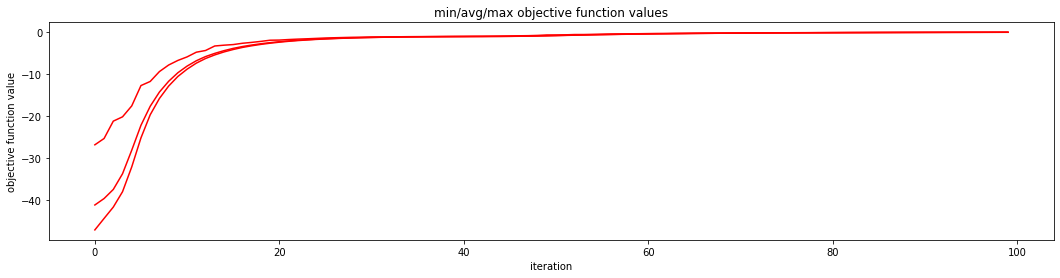

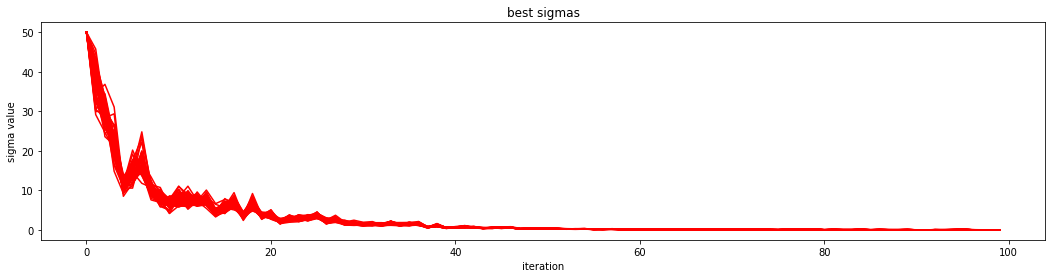



			100 DIMENSIONS

Iteration 0000 : best score = -53.59133381, mean score = -83.54286908.
Iteration 0010 : best score = -24.67755380, mean score = -32.45972415.
Iteration 0020 : best score = -11.05563352, mean score = -12.98795985.
Iteration 0030 : best score = -5.47329906, mean score = -6.52192513.
Iteration 0040 : best score = -3.04507384, mean score = -3.56482048.
Iteration 0050 : best score = -2.03546812, mean score = -2.19306417.
Iteration 0060 : best score = -1.49081166, mean score = -1.57148923.
Iteration 0070 : best score = -1.23739830, mean score = -1.27597045.
Iteration 0080 : best score = -1.11249726, mean score = -1.13438927.
Iteration 0090 : best score = -1.03298167, mean score = -1.05859165.


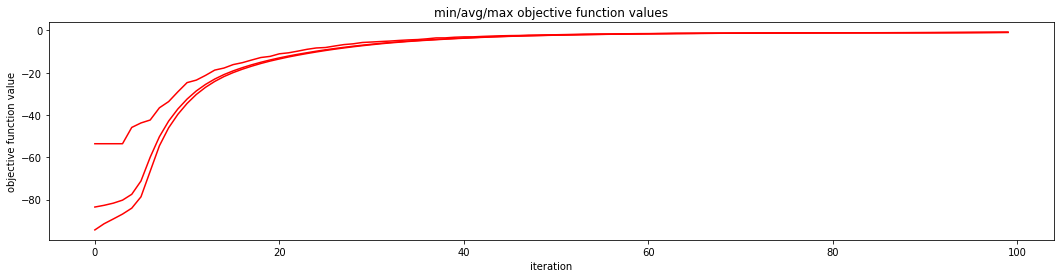

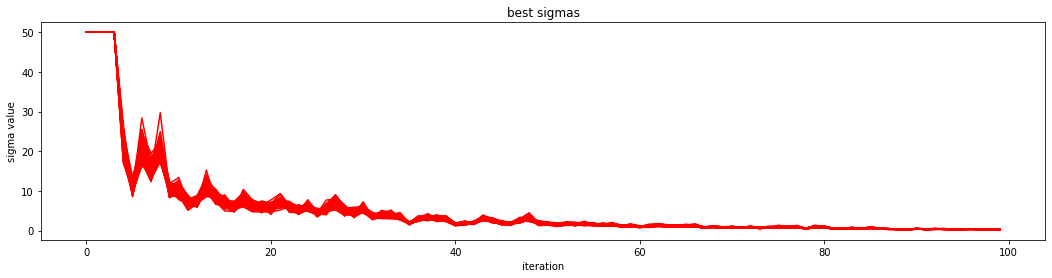

In [29]:
N = 2000
T = 100

for d in DIMS:
    print(f'\n\n\t\t\t{d} DIMENSIONS\n')
    
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()